In [1]:
%%writefile app.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.impute import SimpleImputer

Writing app.py


In [2]:
df=pd.read_csv("data.csv")
df.head()

NameError: name 'pd' is not defined

In [ ]:
#basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None


In [ ]:
print(df.isnull().sum())

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


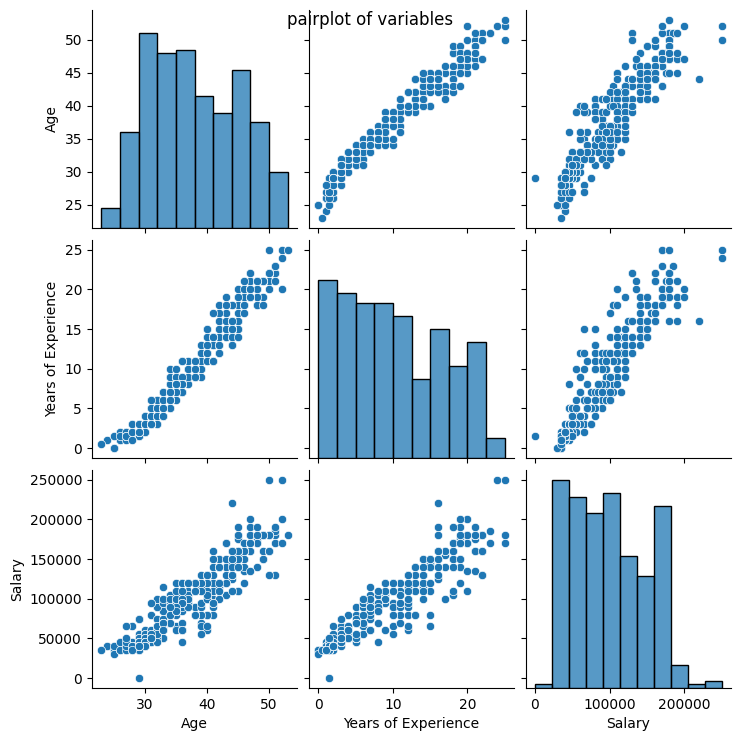

In [ ]:
sns.pairplot(df)
plt.suptitle('pairplot of variables')
plt.show()

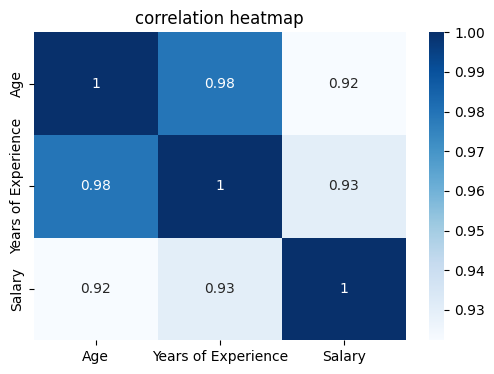

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')
plt.title('correlation heatmap')
plt.show()

In [ ]:
df_encoded=pd.get_dummies(df,columns=['Gender','Education Level','Job Title'],drop_first=True)
print("\n Encoded Columns:\n",df_encoded.columns)


 Encoded Columns:
 Index(['Age', 'Years of Experience', 'Salary', 'Gender_Male',
       'Education Level_Master's', 'Education Level_PhD',
       'Job Title_Accountant', 'Job Title_Administrative Assistant',
       'Job Title_Business Analyst', 'Job Title_Business Development Manager',
       ...
       'Job Title_Supply Chain Manager', 'Job Title_Technical Recruiter',
       'Job Title_Technical Support Specialist', 'Job Title_Technical Writer',
       'Job Title_Training Specialist', 'Job Title_UX Designer',
       'Job Title_UX Researcher', 'Job Title_VP of Finance',
       'Job Title_VP of Operations', 'Job Title_Web Developer'],
      dtype='object', length=179)


In [ ]:
df_encoded.dropna(inplace=True)

In [ ]:
X=df_encoded.drop('Salary',axis=1)
y=df_encoded['Salary']

In [ ]:
imputer=SimpleImputer(strategy='mean')
X=pd.DataFrame(imputer.fit_transform(X),columns=X.columns)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("\n Model Coefficients:")
coeff_df=pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)


 Model Coefficients:
                             Coefficient
Age                         2.477170e+03
Years of Experience         1.143458e+03
Gender_Male                 8.315781e+02
Education Level_Master's    5.293300e+03
Education Level_PhD         1.305268e+04
...                                  ...
Job Title_UX Designer      -6.205064e+03
Job Title_UX Researcher    -3.637979e-12
Job Title_VP of Finance     6.475174e+04
Job Title_VP of Operations  5.475174e+04
Job Title_Web Developer    -1.540963e+04

[178 rows x 1 columns]


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print("\n Model performance:")
print(f"Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print(f"Mean Squared Error:",mean_squared_error(y_test,y_pred))
print(f"Root Mean squared Error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print(f"R2 Score:",r2_score(y_test,y_pred))


 Model performance:
Mean Absolute Error: 11596.521058222646
Mean Squared Error: 354248539.00766945
Root Mean squared Error: 18821.491412947846
R2 Score: 0.8522475952130931


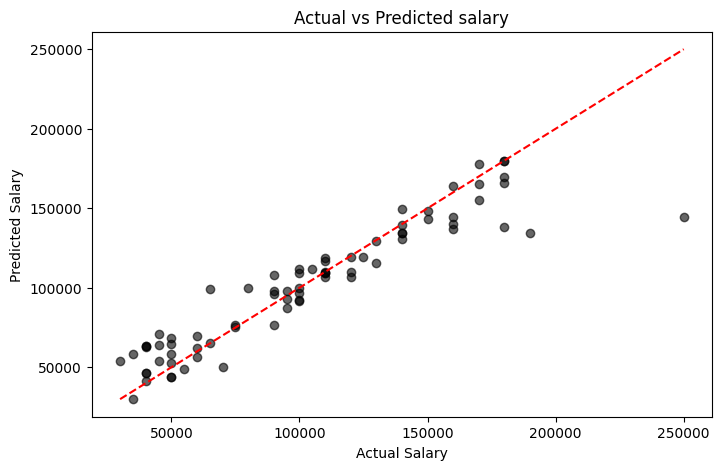

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred,alpha=0.6,color="black")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted salary")
plt.show()

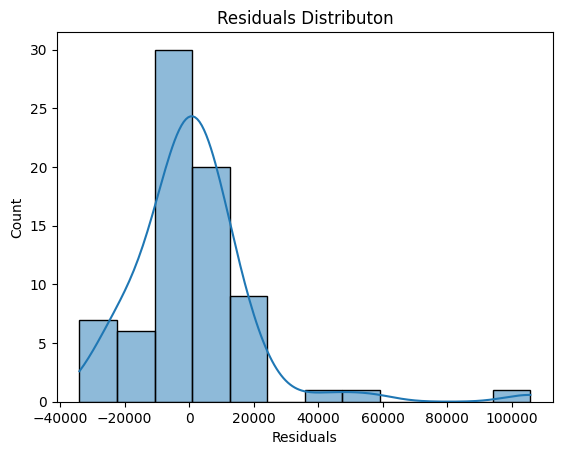

In [ ]:
residuals=y_test-y_pred
sns.histplot(residuals,bins=12,kde=True)
plt.title("Residuals Distributon")
plt.xlabel("Residuals")
plt.show()

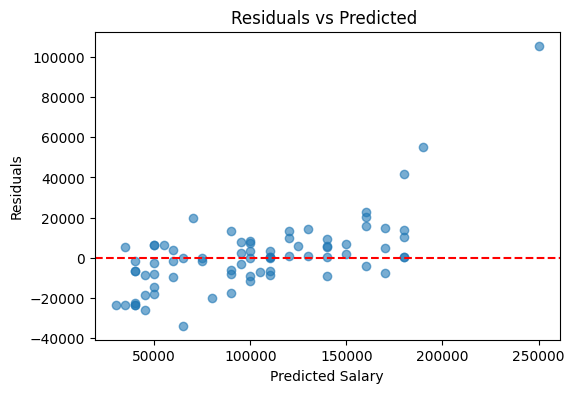

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test,residuals,alpha=0.6)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted ")
plt.show()

In [ ]:
def predict_salary(age,gender,education_level,job_title,years_of_experience):
  input_data=pd.DataFrame({
      'Age':[age],
      'years of Experience':[years_of_experience],
      'Gender_'+gender:[1],
      'Education Level_'+education_level:[1],
      'Job Title'+job_title:[1],
  })
  input_data=input_data.reindex(columns=X.columns,fill_value=0)
  input_data=input_data[X.columns]
  predicted_salary=model.predict(input_data)[0]
  print(f"\n Predicted salary for Input: NPR {predicted_salary:.2f}")

In [ ]:
predict_salary(age=23,gender='male',education_level='mba',job_title='software',years_of_experience=1)


 Predicted salary for Input: NPR 47945.61
